In [4]:
from config import CONFIG
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
%matplotlib notebook
import math
import numpy as np
import pandas as pd
import sys
import time

In [5]:
path = CONFIG['PATH']
pair = CONFIG['BASE'] + "/" + CONFIG['QUOTE']
one_day = 86400
sequence_length = 1
candlesticks = pd.read_csv(path + "/data/candlesticks.csv")
candlesticks['date'] = pd.Series([dt.datetime.fromtimestamp(int(ts)).strftime('%Y-%m-%d')
                                 for ts in candlesticks['date']]).values
candlesticks = candlesticks[['date','open','high','low','close','volume','weightedAverage']]

<IPython.core.display.Javascript object>


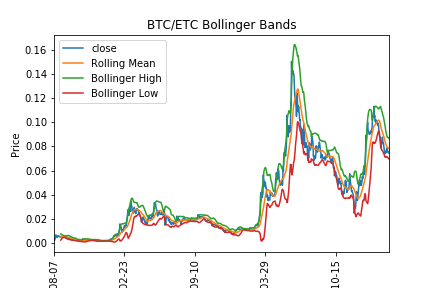

In [8]:
window = 20
no_of_std = 2

rm_btc = pd.Series(candlesticks['close']).rolling(window=window).mean()
rstd_btc = pd.Series(candlesticks['close']).rolling(window=window).std()
candlesticks['Rolling Mean'] = rm_btc
candlesticks['Bollinger High'] = rm_btc + (rstd_btc * no_of_std)
candlesticks['Bollinger Low'] = rm_btc - (rstd_btc * no_of_std)
x = candlesticks['date']
ax = candlesticks[['close','Rolling Mean', 'Bollinger High', 'Bollinger Low']].plot(x, title="BTC/ETC Bollinger Bands", label="BTC/ETC")
plt.xticks(rotation='vertical')

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')